# Problem Statement
This company deals in all home loans. Customer first apply for home loan,after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
We are gonna categorize the customers on the basis of details like Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.
We are gonna perform binary classification and assign 0 for customers not eligible for loan and 1 for customers who are.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# for plotting graphs
import matplotlib.pyplot as plt
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Reading the Data

Train Data - for training the model. It contains all the independent variables and the target variable.

Test Data - for testing the model. We will apply the model to predict the target variable for the test data.

To determine the accuracy of our model after training it, we will test on the unseen data called as test data.

In [2]:
train=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('../input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')

In [3]:
# copies of the data 
train_original = train.copy()
test_original = test.copy()

## Simple look on the data

In [4]:
train.shape

(614, 13)

This indicates 614 rows(customers) and 13 columns(variables)

In [5]:
train.head()
# to have a look on the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## HYPOTHESIS
Below are some factors which I think can affect the loan approval-

1) Greater the applicant income, greater the loan approval chances.

2) Lesser the loan amount,greater the loan approval chances.

3) Property Area = Urban, greater chances.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This indicates the presence of missing values. We will take care of them as we proceed.

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This gives a description of the numeric data

In [8]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [9]:
#we will change the type of Credit_History to object becaues we can see that it is 1 or 0

train['Credit_History'] = train['Credit_History'].astype('O')

Describe categorical data

In [10]:
train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002813,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [11]:
# we will drop ID because it's not important for our model and it will just mislead the model

train.drop('Loan_ID', axis=1, inplace=True)

In [12]:
train.duplicated().any()


False

This indicates no duplicate rows.

# Let us have a look at the target variable of the train set.

The percentage of Y class : 0.69
The percentage of N class : 0.31


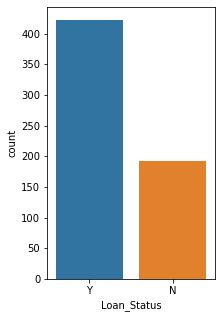

In [13]:

plt.figure(figsize=(3,5))
sns.countplot(train['Loan_Status']);

print('The percentage of Y class : %.2f' % (train['Loan_Status'].value_counts()[0] / len(train)))
print('The percentage of N class : %.2f' % (train['Loan_Status'].value_counts()[1] / len(train)))

As we can see, our data is imbalanced since there 70-30 distribution between approved and unapproved applicants.

# Exploratory Data Analysis or EDA 
This is the process where the data is intensely studied.It helps us understand the mystery and insights behind the data which may not make sense in the first glance.
EDA employs three primary statistical techniques to go about this exploration:

1)Univariate Analysis

2)Bivariate Analysis

3)Multivariate Analysis

### UNIVARIATE ANALYSIS
This is the simplest from of statistical analysis.Only one variable is studied at a time.
It helps us to formulate conclusions such as-

1.Outlier detection

2.Concentrated points

3.Pattern recognition

4.Required transformations

We are visulaising different types of variables :

1.Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

2.Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

3.Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

### CATEGORICAL FEATURES

Text(0.5, 1.0, 'Gender')

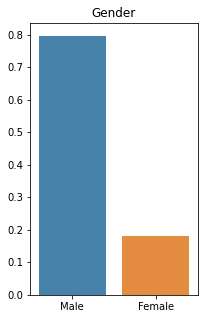

In [14]:
plt.figure(figsize=(3,5))
sns.barplot(train['Gender'].value_counts().index, train['Gender'].value_counts().values/614, alpha=0.9 )
plt.title('Gender')

Text(0.5, 1.0, 'Married')

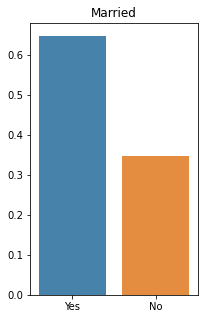

In [15]:
plt.figure(figsize=(3,5))
sns.barplot(train['Married'].value_counts().index, train['Married'].value_counts().values/614, alpha=0.9 )
plt.title('Married')

Text(0.5, 1.0, 'Self_Employed')

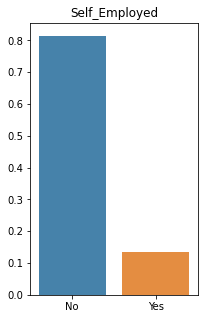

In [16]:
plt.figure(figsize=(3,5))
sns.barplot(train['Self_Employed'].value_counts().index, train['Self_Employed'].value_counts().values/614, alpha=0.9 )
plt.title('Self_Employed')

Text(0.5, 1.0, 'Credit_History')

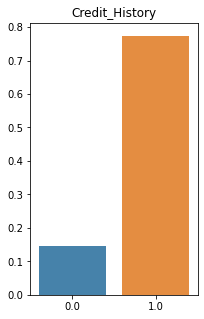

In [17]:
plt.figure(figsize=(3,5))
sns.barplot(train['Credit_History'].value_counts().index, train['Credit_History'].value_counts().values/614 , alpha=0.9)
plt.title('Credit_History')

### ORDINAL FEATURES

Text(0.5, 1.0, 'Dependents')

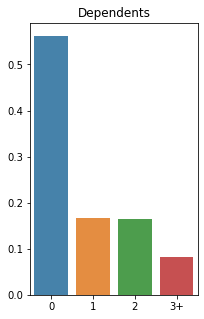

In [18]:
plt.figure(figsize=(3,5))
sns.barplot(train['Dependents'].value_counts().index, train['Dependents'].value_counts().values/614, alpha=0.9 )
plt.title('Dependents')

Text(0.5, 1.0, 'Education')

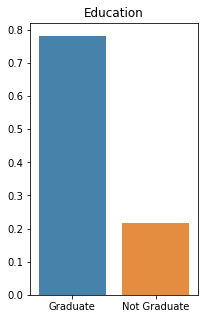

In [19]:
plt.figure(figsize=(3,5))
sns.barplot(train['Education'].value_counts().index, train['Education'].value_counts().values/614, alpha=0.9 )
plt.title('Education')

Text(0.5, 1.0, 'Property Area')

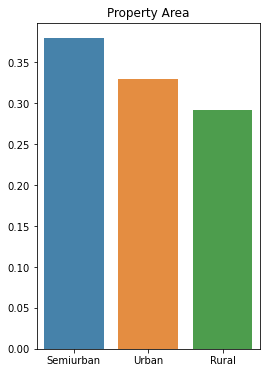

In [20]:
plt.figure(figsize=(4,6))
sns.barplot(train['Property_Area'].value_counts().index, train['Property_Area'].value_counts().values/614, alpha=0.9 )
plt.title('Property Area')

#### CONCLUSION:

1) 80% males and 20% females

2) 65% married and 35% not married

3) 80% not self employed and 10% self employed

4) 80% have credit history and 20% do not have

5) Less than 10% of the applicants have 3+ dependents and more than 50% have 0 dependents.

### NUMERIC FEATURES

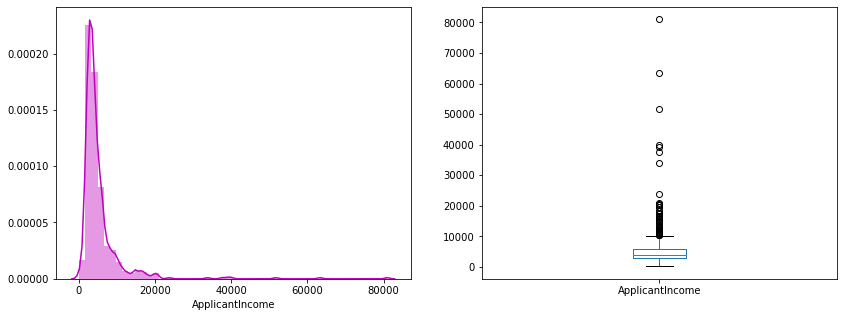

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'], color='m')

plt.subplot(122)
train['ApplicantIncome'].plot(kind='box',figsize=(14,5))


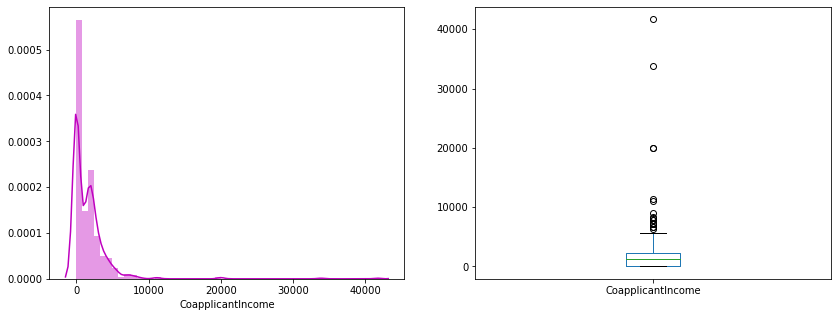

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'], color='m')

plt.subplot(122)
train['CoapplicantIncome'].plot(kind='box',figsize=(14,5))


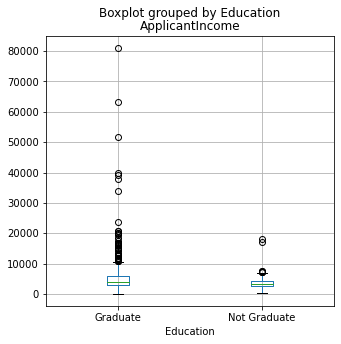

In [23]:
train.boxplot(column='ApplicantIncome',by='Education', figsize=(5,5))


This shows that theres are higher number of graduates who have higher incomes which seem to be the majority outliers in the boxplot.

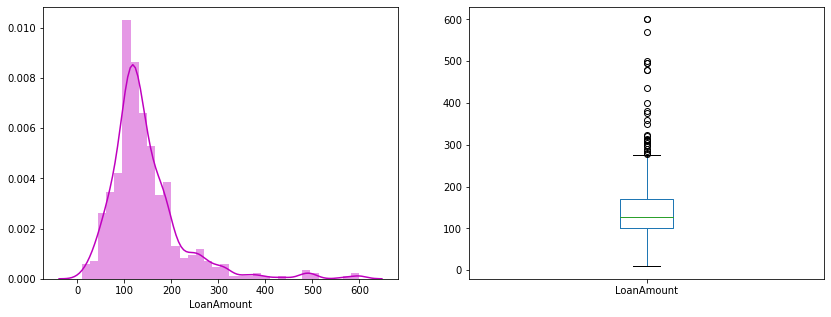

In [24]:
plt.figure(1)
plt.subplot(121)
df_train = train.dropna() # to remove 'cannot convert float NaN to integer' error
sns.distplot(df_train['LoanAmount'], color='m')

plt.subplot(122)
df_train['LoanAmount'].plot(kind='box',figsize=(14,5))


In [25]:
'''plt.figure(1)
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term'],color='m')'''




"plt.figure(1)\nplt.subplot(121)\nsns.distplot(train['Loan_Amount_Term'],color='m')"

It can be inferred that most of the data in the distribution of applicant income, co- applicant income and loan amount is towards left and of loan amount term is towards right which means they are not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. 

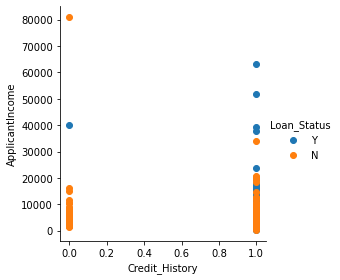

In [26]:
sns.set_style=("whitegrid")
sns.FacetGrid(train,hue="Loan_Status",size=4).map(plt.scatter,"Credit_History","ApplicantIncome").add_legend();
plt.show()

From the above visualization we can say that applicants with income below 20,000 with no prior credit history and are not granted a loan. But this approach also does not make sense as loan status depends on various other factors.

## BIVARIATE ANAYLYSIS
We need to see how each variable correlates with Loan Status. This is done using bivariate analysis.

#### CATEGORICAL VARIABLE against TARGET VARIABLE(loan status)

1. Married vs loan status

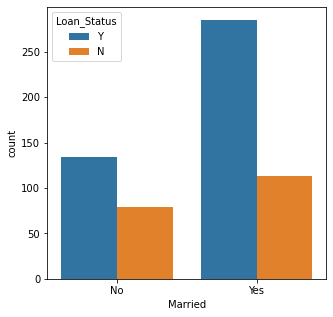

In [27]:
# Married
plt.figure(figsize=(5,5))
sns.countplot(x='Married', hue='Loan_Status', data=train)




We can infer that percentage of married people who have got their loan approved is higher when compared to non- married people.

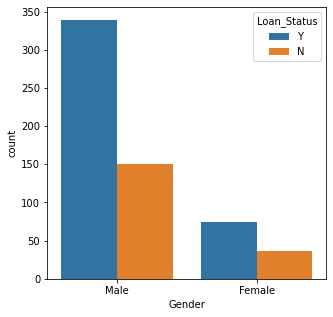

In [28]:
#gender
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', hue='Loan_Status', data=train)

Males have a higher proportion of loan approval than females.

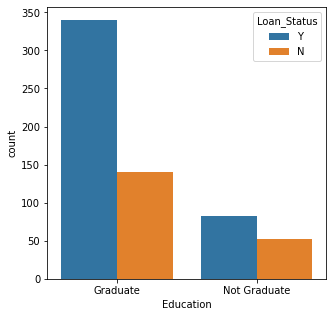

In [29]:
#Education
plt.figure(figsize=(5,5))
sns.countplot(x='Education', hue='Loan_Status', data=train)

Graduates have a higher proportion of loan approvals than not Graduates.

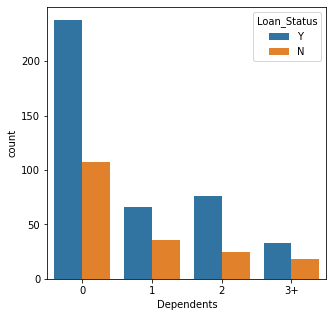

In [30]:
#dependents
plt.figure(figsize=(5,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=train)

customers with 0 or 2 dependents have a higher proportion of loan approval.

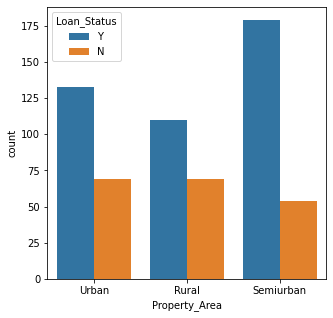

In [31]:
#property area
plt.figure(figsize=(5,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train)

Loan approval for Semiurban areas is higher

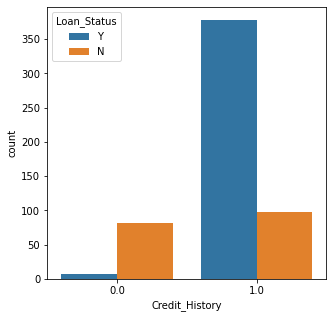

In [32]:
#credit history
plt.figure(figsize=(5,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)

Customers with prior credit history have a very high chance of loan approval.

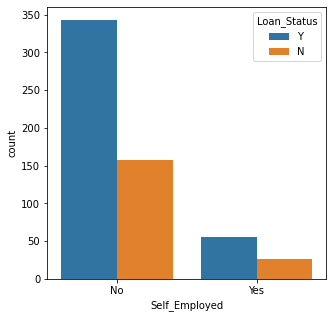

In [33]:
#self employed
plt.figure(figsize=(5,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train)

There is hardly any correlation between Loan_Status and Self_Employed applicants. So in short we can say that it doesn’t matter whether the applicant is self employed or not.

#### NUMERIC VARIABLE against TARGET VARIABLE(loan status)

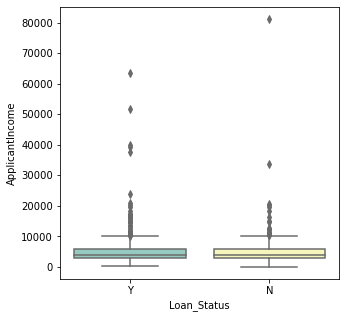

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train , palette='Set3')


We make bins for the applicant income varaiable based on the values in it and analyse the corresponding loan status for each bin.

In [35]:
max(train['ApplicantIncome']), min(train['ApplicantIncome'])

(81000, 150)

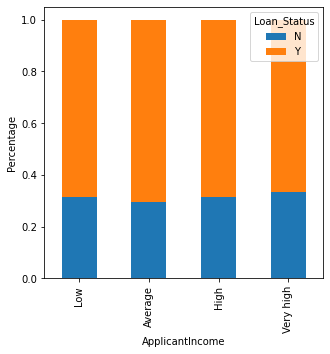

In [36]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(5,5)) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

The above results show that ApplicantIncome has no effect on Loan_Status which contradicts our hypothesis. Let's analyze the effect of coapplicantIncome on Loan_Status

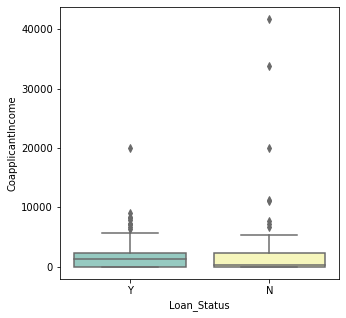

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=train , palette='Set3')

In [38]:
max(train['CoapplicantIncome']), min(train['CoapplicantIncome'])

(41667.0, 0.0)

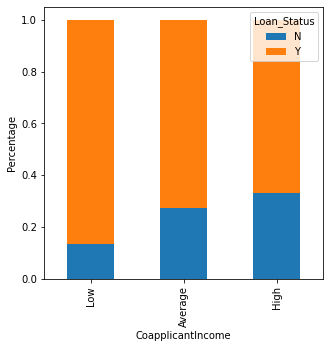

In [39]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel('CoapplicantIncome') 
P=plt.ylabel('Percentage')

From the above graph we can infer that applicants having low coapplicant incomes have a higher chance of loan approval than those whose coapplicant income is higher. This doesnt fit logically into the problem as CoapplicantIncome should be higher to help repay the loan.

The possible explanation can be that not many applicants have a coapplicant , therefore the coapplicant income for them is 0 and hence the loan approval is not dependent on it.So we will make a new variable to see the combined effect on Loan status.

In [40]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

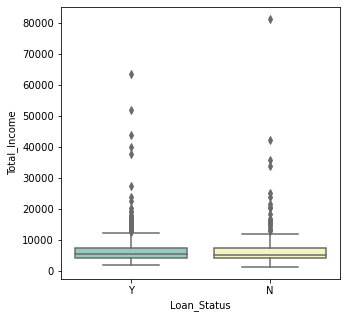

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='Total_Income', data=train , palette='Set3')

In [42]:
max(train['Total_Income'])

81000.0

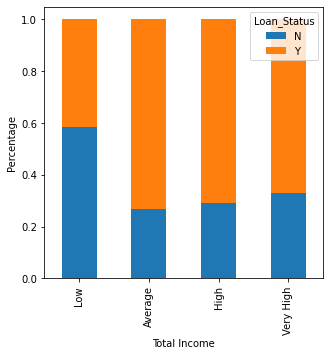

In [43]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel('Total Income') 
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

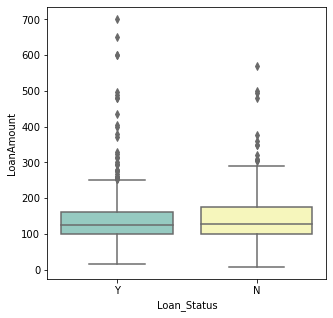

In [44]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train , palette='Set3')

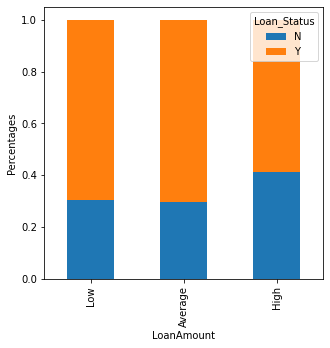

In [45]:
bin2 = [0,100,300,700]
group2 = ['Low','Average','High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bin2,labels= group2)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin = LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.xlabel('LoanAmount')
P = plt.ylabel("Percentages")

Proportion of approved loans is higher for low and average Loan Amount as compared to that of High loan amount which supports our our initial hypothesis that approval chance is more for less loan amount.

Now we will drop the bins we made for the exploration part and move on to the next section of data cleaning .

In [46]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1)

In [47]:
train.shape
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


#### With this we have completed our exploratory data analysis on the training data.

# DATA CLEANING

## MISSING VALUES TREATMENT

In [48]:
train.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Missing values in Gender,Married,Dependents,Self employed,Loan amount,Loan amount term and Credit history.

In [49]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

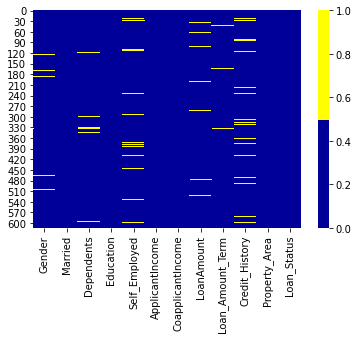

In [50]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train.isnull(), cmap=sns.color_palette(colours))

The yellow bars indicates missing values while blue bars indicate no missing values.

We can treat the missing values according to the following:

1. Categorical Variables- imputation using mode
2. Numerical Variables-imputation using mean or median

#### CATEGORICAL VARIABLES

Replacing by the most frequesnt value,mode.

In [51]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)

#### NUMERIC VARIABLES

As the mean is adversely affected by outliners and our data has a lot of outliners, we replace numeric values with the MEDIAN.

In [52]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace = True)

#### CONTINIOUS VARIABLES

In [53]:
train['Loan_Amount_Term'].median()

360.0

In [54]:
train['Loan_Amount_Term'].mode()[0]

360.0

The Loan_Amount_Term is a continuous variable here. So instead of directly going with the median here, we would like to get an idea of what data represents by seeing the most occuring value.

But, here we get both the mode and median as 360. So we are choosing 360 to replace which just validates our point.

In [55]:
train['Loan_Amount_Term'].fillna(360, inplace =True)

In [56]:
train.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

All the missing data has been taken care of in our train datset. Using the similar approach, we will fill all the missing values in our test dataset.

In [57]:
test.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [58]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

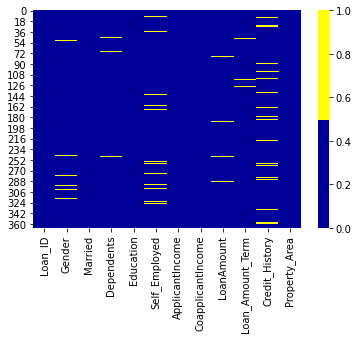

In [59]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(test.isnull(), cmap=sns.color_palette(colours))

We observe that there are few missing values in test data set and now we will impute the new values , the same way we did for the train dataset above.

#### CATEGORICAL VARIABLES
Replacing by mode

In [60]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)

#### NUMERIC VARIABLES
Replacing by median

In [61]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace = True)

#### CONTINIOUS VARIABLES


In [62]:
test['Loan_Amount_Term'].median()

360.0

In [63]:
test['Loan_Amount_Term'].mode()[0]

360.0

In [64]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [65]:
test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

## OUTLINER TREATMENT

checking for outliners in numeric data-

### 1) LOAN AMOUNT

#### TRAIN SET

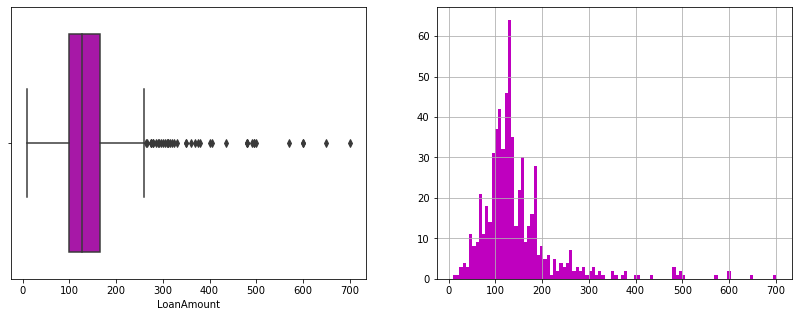

In [66]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['LoanAmount'], color='m')

plt.subplot(122)
train['LoanAmount'].hist(bins=100,figsize=(14,5), color='m')



Due to the outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

In [67]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

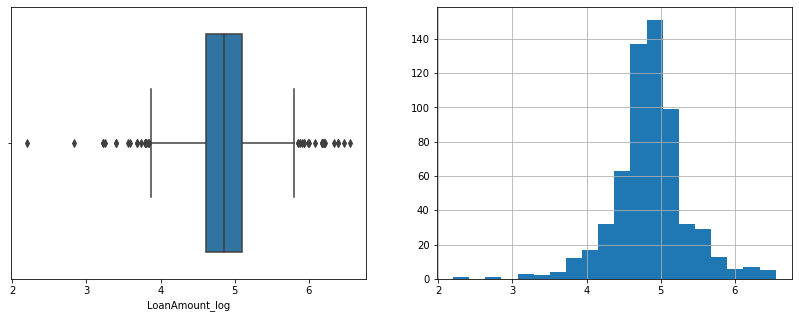

In [68]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['LoanAmount_log'])

plt.subplot(122)
train['LoanAmount_log'].hist(bins=20,figsize=(14,5))

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

#### TEST SET

In [69]:
#doing the same for loan amount in test set
test['LoanAmount_log'] = np.log(test['LoanAmount'])

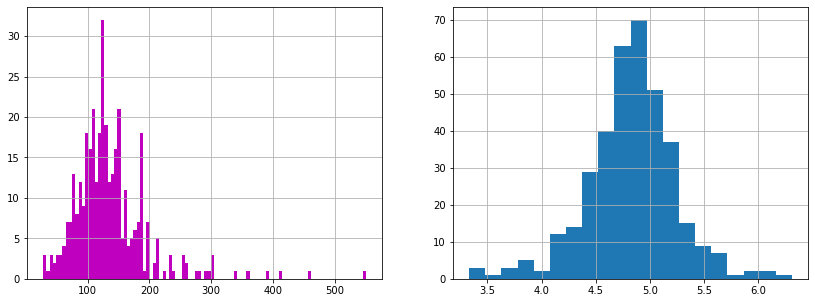

In [70]:
plt.figure(1)
plt.subplot(121)
test['LoanAmount'].hist(bins=100,figsize=(14,5),color='m')

plt.subplot(122)
test['LoanAmount_log'].hist(bins=20,figsize=(14,5))

### 2) APPLICANT INCOME

#### TRAIN SET

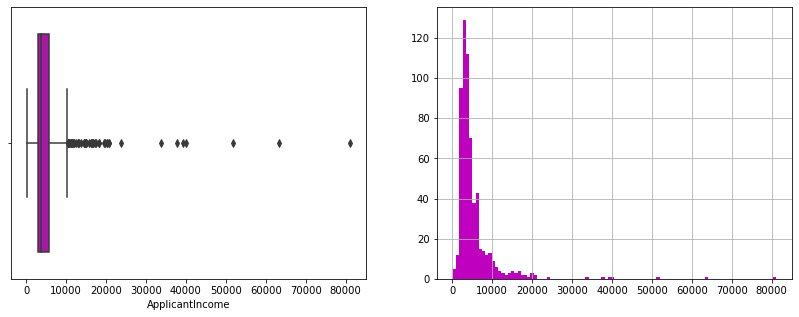

In [71]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['ApplicantIncome'], color='m')

plt.subplot(122)
train['ApplicantIncome'].hist(bins=100,figsize=(14,5), color='m')


In [72]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])

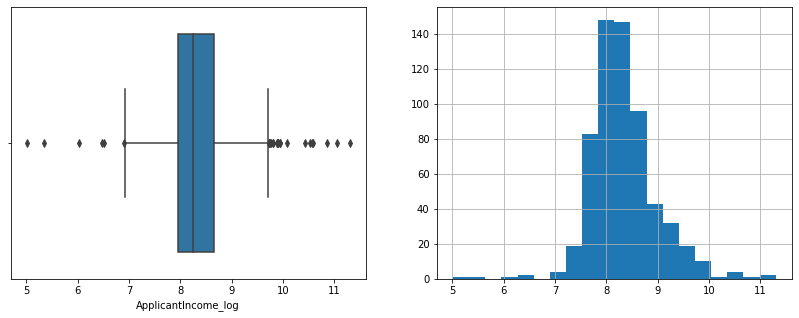

In [73]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['ApplicantIncome_log'])

plt.subplot(122)
train['ApplicantIncome_log'].hist(bins=20,figsize=(14,5))


Now it is normalized.

#### TEST SET

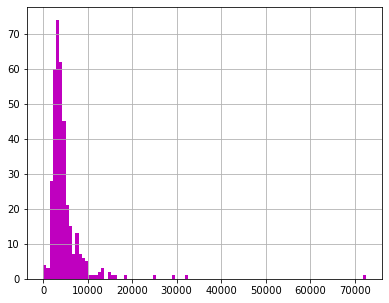

In [74]:
plt.figure(1)
plt.subplot(121)
test['ApplicantIncome'].hist(bins=100,figsize=(14,5),color='m')


In [75]:
test['ApplicantIncome_log'] = np.log(test['ApplicantIncome'])

### 2) CO-APPLICANT INCOME

#### TRAIN SET

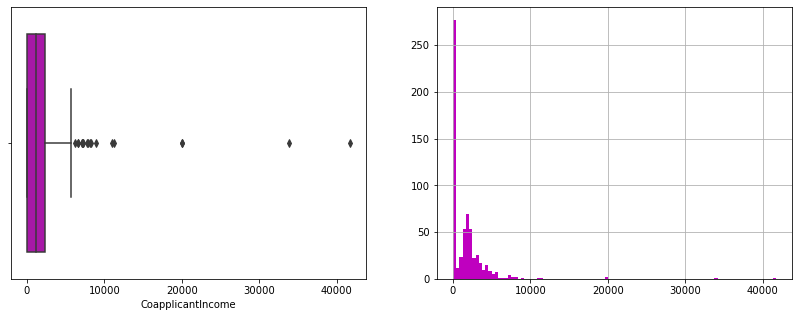

In [76]:
plt.figure(1)
plt.subplot(121)
sns.boxplot(train['CoapplicantIncome'], color='m')

plt.subplot(122)
train['CoapplicantIncome'].hist(bins=100,figsize=(14,5), color='m')


Not many outliners, therefore leave it as it is.

# MODEL BUILDING



The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

    1. True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
    2. True Negative - Targets which are actually false(N) and we have predicted them false(N)
    3. False Positive - Targets which are actually false(N) but we have predicted them true(T)
    4. False Negative - Targets which are actually true(T) but we have predicted them false(N)


1)ACCURACY: (True Positive + True Negative) / (True Positive + False Positive + True Negative + False Positive)

2)PRECISION: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true. = TP / (TP + FP)

3)RECALL(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. = TP / (TP + FN)

3)SPECIFICITY - It is a measure of how many observations of false class are labeled correctly. = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

In [77]:
#Making a new variable for total income
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [78]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,8.674026,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.430109,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.856707,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515,6000.0


For modelling in Python, we have an inbuilt library called scikit-learn(sklearn).
Sklearn requires the Independent variables and the target variable (Loan Status) in separate datasets. So, we will drop our target variable from the train dataset and save it in another dataset.

We will save the x_train dataset without the target variable and save the target variable into y_train.

In [79]:
x_train_original = train.drop('Loan_Status',1)
y_train_original = train['Loan_Status']

In [80]:
x_train_original.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030,8.674026,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030,8.430109,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655,8.006368,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492,7.856707,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760,8.699515,6000.0


In [81]:
y_train_original.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

An important point to remember is that Logistic Regression only takes numerical inputs. In our dataset we only have few numerical variables and rest are categorical variables. These categorical variables have to be converted to numeric values to be able to feed them into our regression model.

We achieve this by using pd.get_dummies() function. The .get_dummies() turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

For example, Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female. Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [82]:
x_train_original = pd.get_dummies(x_train_original)

In [83]:
y_train_original.replace('N', 0,inplace=True)
y_train_original.replace('Y', 1,inplace=True)

In [84]:
x_train_original

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,TotalIncome,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,8.674026,5849.0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,8.430109,6091.0,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,8.006368,3000.0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,7.856707,4941.0,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,8.699515,6000.0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,7.972466,2900.0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,8.320205,4106.0,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,8.996157,8312.0,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,8.933664,7583.0,0,1,...,0,1,0,1,0,1,0,0,0,1


In [85]:
y_train_original

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### CORRELATION ANALYSIS

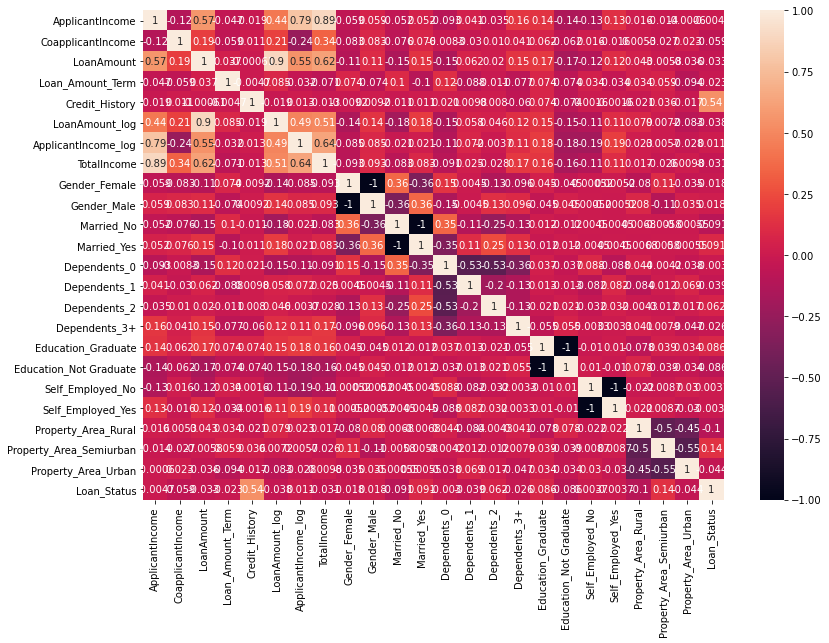

In [86]:
data_corr = pd.concat([x_train_original, y_train_original], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(13,9))
sns.heatmap(corr, annot=True)

In [87]:
data_corr.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log,TotalIncome,Gender_Female,Gender_Male,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.435392,0.790532,0.893037,-0.058809,0.058809,...,-0.034650,0.156687,0.140760,-0.140760,-0.127180,0.127180,0.015829,-0.014246,-0.000598,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.206330,-0.237900,0.342781,-0.082912,0.082912,...,0.010016,0.041491,0.062290,-0.062290,0.016100,-0.016100,0.005329,-0.027044,0.022776,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.895708,0.550849,0.620316,-0.106904,0.106904,...,0.020126,0.152850,0.168759,-0.168759,-0.115100,0.115100,0.043467,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.085353,-0.031731,-0.070917,0.074030,-0.074030,...,-0.010609,-0.077273,0.073928,-0.073928,0.033739,-0.033739,0.034321,0.059141,-0.094279,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,-0.018547,0.013468,-0.012563,-0.009170,0.009170,...,0.007987,-0.060473,0.073658,-0.073658,0.001550,-0.001550,-0.020906,0.035976,-0.016934,0.540556
LoanAmount_log,0.435392,0.206330,0.895708,0.085353,-0.018547,1.000000,0.491332,0.505306,-0.143388,0.143388,...,0.046270,0.123673,0.145885,-0.145885,-0.109677,0.109677,0.078614,0.007197,-0.083473,-0.037997
ApplicantIncome_log,0.790532,-0.237900,0.550849,-0.031731,0.013468,0.491332,1.000000,0.639953,-0.084514,0.084514,...,-0.003661,0.111812,0.181713,-0.181713,-0.189821,0.189821,0.022500,0.005662,-0.027612,0.010977
TotalIncome,0.893037,0.342781,0.620316,-0.070917,-0.012563,0.505306,0.639953,1.000000,-0.093191,0.093191,...,-0.028237,0.167003,0.161362,-0.161362,-0.113000,0.113000,0.017387,-0.025728,0.009754,-0.031271
Gender_Female,-0.058809,-0.082912,-0.106904,0.074030,-0.009170,-0.143388,-0.084514,-0.093191,1.000000,-1.000000,...,-0.129953,-0.096319,0.045364,-0.045364,-0.000525,0.000525,-0.080283,0.108623,-0.034530,-0.017987
Gender_Male,0.058809,0.082912,0.106904,-0.074030,0.009170,0.143388,0.084514,0.093191,-1.000000,1.000000,...,0.129953,0.096319,-0.045364,0.045364,0.000525,-0.000525,0.080283,-0.108623,0.034530,0.017987


Next is the training of our model based on the training dataset and make predictions on the test data. We also need to provide validation for our model i.e. confirm whether our model is predicting correctly or not. For this we can split our training dataset into training data and validation data. We cannot use our test dataset for this purpose as our test data doesn't provide us with values of the target variable to validate our model. 

Thus to split our train data we use the function train_test_split() from sklearn library.

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x_train_original,y_train_original,test_size = 0.3)

In [89]:
x_train.shape

(429, 23)

In [90]:
x_cv.shape

(185, 23)

In [91]:
y_train.shape

(429,)

In [92]:
y_cv.shape

(185,)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.

## LOGISTIC REGRESSION

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.


Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event. This function creates a s-shaped curve with the probability estimate. We use this curve to predict the probability of the outcome of the event.
If the probabilty is below 0.5, predicted target variable will be NO/0/False.
If the probabilty is above 0.5, predicted target variable will be YES/1/True.

In [93]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [94]:
#Let us predict the results
y_pred=classifier1.predict(x_cv)

In [95]:
#et us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values.
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_cv,y_pred)
print(cm)


[[ 21  24]
 [ 11 129]]


In [96]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_cv,y_pred)*100

81.08108108108108

82% of our predictions are correct

### K-FOLD

The dataset is divided into K grpups(k=10).First, group 1 is taken as test set and all others as train set.Then group 2 is taken as test set and all others as train set. This process repeats till all groups are taken as test set, therefore we get 10 accuracies. This is done because sometimes we get lucky on 1 test set and not others, this way different test sets are tested.

In [97]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier1,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))

Accuracy: 76.00%


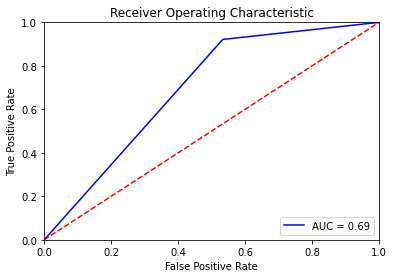

In [98]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_cv, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [99]:
from sklearn.svm import SVC
classifier2=SVC(kernel='rbf')
classifier2.fit(x_train,y_train)

SVC()

In [100]:
y_pred_svm=classifier2.predict(x_cv)

In [101]:
cm=confusion_matrix(y_cv,y_pred_svm)
print(cm)
accuracy_score(y_cv,y_pred_svm)*100

[[  0  45]
 [  0 140]]


75.67567567567568

In [102]:
accuracies=cross_val_score(estimator=classifier2,X=x_train,y=y_train,cv=10)
print("Accuracy of svm: {:.2f}%".format(accuracies.mean()*100))

Accuracy of svm: 65.74%


## K-NEAREST NEIGHBORS 

In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
classifier3.fit(x_train, y_train)
y_pred_knn = classifier3.predict(x_cv)
# Creating confusion matrix and calculating the accuracy score
cm_knn = confusion_matrix(y_cv, y_pred_knn)
print(cm_knn)
accuracy_score(y_cv, y_pred_knn)

[[  6  39]
 [ 10 130]]


0.7351351351351352

## RANDOM FOREST 

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier4=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier4.fit(x_train,y_train)
y_pred_RandomF = classifier4.predict(x_cv)
accuracy_score(y_cv,y_pred_RandomF)

0.827027027027027

## Feature Engineering 

Let us make an attempt to better our score.
We can do this by feature engineering. Based on our domain knowledge, we can say that there are some more factors which may affect our results.
These features can be

1)Total Income: ApplicantIncome + CoapplicantIncome
If the total income is high, the chance of loan approval is also high.

2)EMI: It is the monthly amount to be paid by the applicant to repay the loan. Applicants with higher EMIs might find it difficult to pay back their loans. We calculate this feature by taking ratio of loan_amount with respect to the loan_amount_term.

3)Balance Income: This is the income left after the EMI has been paid. Idea behind creating this variable is that if the value is high, the chances are that they might be able to pay their upcoming EMIs timely and hence loan approval chances go up.

#### TOTAL INCOME

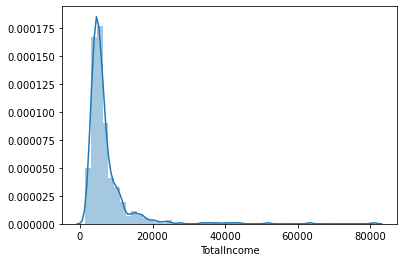

In [105]:
sns.distplot(x_train_original['TotalIncome'])

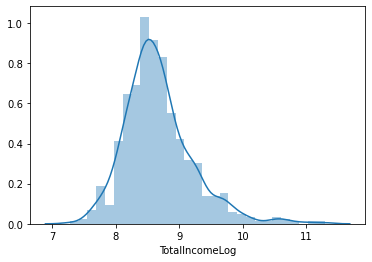

In [106]:
#converting to log as it is not normally distributed
x_train_original['TotalIncomeLog'] = np.log(x_train_original['TotalIncome'])
sns.distplot(x_train_original['TotalIncomeLog'])

In [107]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncomeLog'] = np.log(test['TotalIncome'])

#### EMI

In [108]:
x_train_original['EMI'] = x_train_original['LoanAmount'] / x_train_original['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

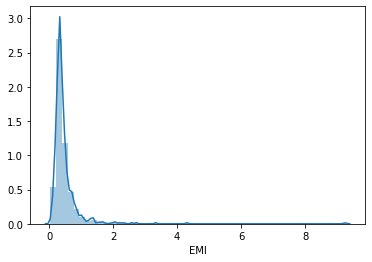

In [109]:
sns.distplot(x_train_original['EMI'])

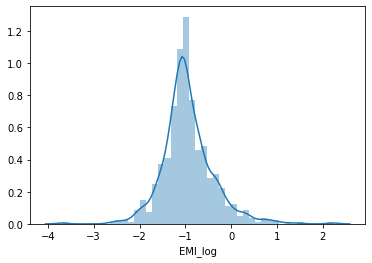

In [110]:
x_train_original['EMI_log'] = np.log(x_train_original['EMI'])
sns.distplot(x_train_original['EMI_log'])

In [111]:
test['EMI_log'] = np.log(test['EMI'])

#### BALANCE INCOME

In [112]:
x_train_original['Balance_Income'] = x_train_original['TotalIncome'] - (x_train_original['EMI']*1000) # *1000 is done to make the units equal for subtraction
test['Balance_Income'] = test['TotalIncome'] - (test['EMI']*1000)

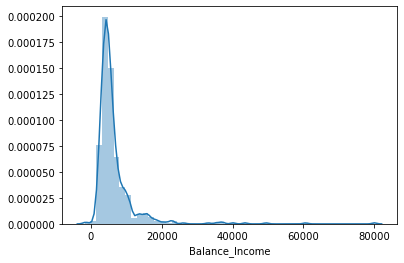

In [113]:
sns.distplot(x_train_original['Balance_Income'])

In [114]:
x_train_original['Balance_Income_log'] = np.log(x_train_original['Balance_Income'])
test['Balance_Income_log'] = np.log(test['Balance_Income'])

We will copy our train and test dataset to a new dataset called train_new and test_new. (We are basically making copies of our dataset to retain its contents and ensure that no changes are made to the original. All changes will be made in the new copy.)

From the new copies of our train and test datasets we will drop all those features which were used to create these new features - EMI, Balance_Income and Total_Income.

We will drop 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term' as the correlation between these features and the new features will be very high and the linear regression model assumes that the correlation between variables is not too high i.e they are not highly correlated. We also wish to remove noise from our dataset and removing these features will help in noise reduction as well.

In [115]:
x_train_original = x_train_original.drop(['ApplicantIncome', 'CoapplicantIncome', 
                        'LoanAmount', 'Loan_Amount_Term' , 'EMI','TotalIncome','Balance_Income'],axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 
                        'LoanAmount', 'Loan_Amount_Term','EMI','TotalIncome','Balance_Income'],axis = 1)

In [116]:
x_train_original.head(3)

,Credit_History,LoanAmount_log,ApplicantIncome_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncomeLog,EMI_log,Balance_Income_log
0,1.0,4.852030,8.674026,0,1,1,0,1,0,0,...,1,0,1,0,0,0,1,8.674026,-1.034074,8.611311
1,1.0,4.852030,8.430109,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,8.714568,-1.034074,8.654421
2,1.0,4.189655,8.006368,0,1,0,1,1,0,0,...,1,0,0,1,0,0,1,8.006368,-1.696449,7.943309


## FINAL MODEL BUILDING

In [117]:
from sklearn.model_selection import train_test_split
x_train1, x_cv1, y_train1, y_cv1 = train_test_split(x_train_original,y_train_original,test_size = 0.3)

In [118]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [119]:
x_train1.isnull().sum()

Credit_History             0
LoanAmount_log             0
ApplicantIncome_log        0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
TotalIncomeLog             0
EMI_log                    0
Balance_Income_log         2
dtype: int64

In [120]:
x_train1['Balance_Income_log'].fillna(x_train1['Balance_Income_log'].median(),inplace = True)


In [121]:
x_cv1.isnull().sum()

Credit_History             0
LoanAmount_log             0
ApplicantIncome_log        0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
TotalIncomeLog             0
EMI_log                    0
Balance_Income_log         0
dtype: int64

In [122]:
x_cv1['Balance_Income_log'].fillna(test['Balance_Income_log'].median(),inplace = True)

In [123]:
""" LOGISTIC REGRESSION """
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', random_state = 13)
logreg.fit(x_train1, y_train1)
y_pred_logreg = logreg.predict(x_cv1)
# Creating confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_logreg = confusion_matrix(y_cv1, y_pred_logreg)
as_logreg=accuracy_score(y_cv1, y_pred_logreg)
print(as_logreg)

0.7351351351351352


In [124]:
x_cv1.isnull().sum()

Credit_History             0
LoanAmount_log             0
ApplicantIncome_log        0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
TotalIncomeLog             0
EMI_log                    0
Balance_Income_log         0
dtype: int64

Best Threshold=0.412384, G-Mean=0.710


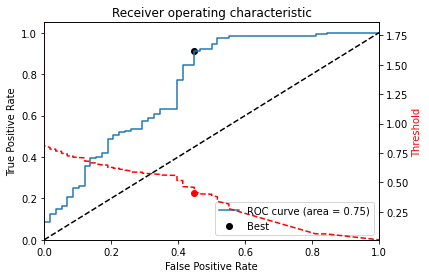

In [125]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_logreg = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_logreg))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()

In [126]:
""" K-NEAREST NEIGHBORS """
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
KNN.fit(x_train1, y_train1)
y_pred = KNN.predict(x_cv1)
# Creating confusion matrix and calculating the accuracy score
cm_knn = confusion_matrix(y_cv1, y_pred)
as_knn=accuracy_score(y_cv1, y_pred)


In [127]:
print(as_knn)

0.6972972972972973


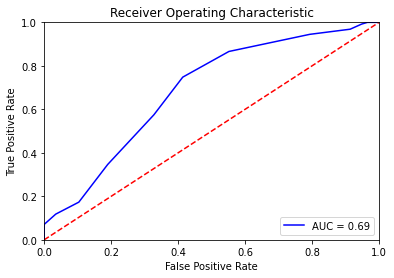

In [128]:
# calculate the fpr and tpr for all thresholds of the classification
probs = KNN.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_knn = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [129]:
"""Naive Bayes Classifier"""
from sklearn.naive_bayes import GaussianNB
NaiveB = GaussianNB()
NaiveB.fit(x_train1, y_train1)
y_pred1 = NaiveB.predict(x_cv1)
# Creating confusion matrix and calculating the accuracy score
cm_nb = confusion_matrix(y_cv1, y_pred1)
as_nb = accuracy_score(y_cv1, y_pred1)
print(cm_nb)
print(as_nb)

[[ 30  28]
 [ 13 114]]
0.7783783783783784


Best Threshold=0.719172, G-Mean=0.723


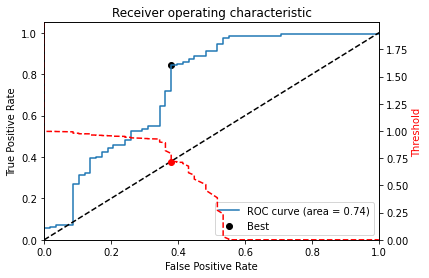

In [130]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = NaiveB.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_nb))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()

In [131]:
""" SVM GAUSSIAN """
from sklearn.svm import SVC
SVCG = SVC(kernel = 'rbf', class_weight='balanced',random_state = 42, probability = True)
SVCG.fit(x_train1, y_train1)
y_pred = SVCG.predict(x_cv1)
# Creating confusion matrix and calculating the accuracy score
cm_svm_gaussian = confusion_matrix(y_cv1, y_pred)
as_svm_gaussian = accuracy_score(y_cv1, y_pred)
print(as_svm_gaussian)

0.7675675675675676


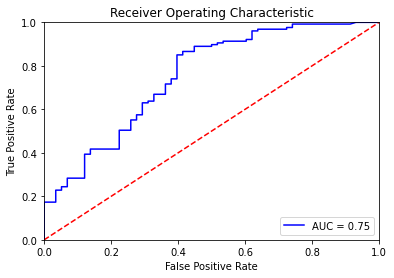

In [132]:
# calculate the fpr and tpr for all thresholds of the classification
probs = SVCG.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_svg = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [133]:
""" DECISION TREE CLASSIFICATION """
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DTC.fit(x_train1, y_train1)
y_pred = DTC.predict(x_cv1)
# Creating confusion matrix and calculating the accuracy score
cm_dtc = confusion_matrix(y_cv1, y_pred)
as_dtc = accuracy_score(y_cv1, y_pred)
print(as_dtc)

0.7189189189189189


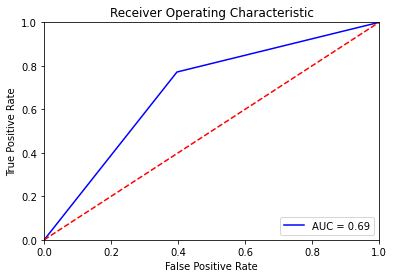

In [134]:
# calculate the fpr and tpr for all thresholds of the classification
probs = DTC.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_dt = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### RANDOM FOREST 

In [135]:
""" RANDOM FOREST CLASSIFIER """
from sklearn.ensemble import RandomForestClassifier
RanForest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1, max_depth = 5)
RanForest.fit(x_train1, y_train1)
y_pred = RanForest.predict(x_cv1)
# Creating confusion matrix and calculating the accuracy score
cm_rfc = confusion_matrix(y_cv1, y_pred)
as_rfc = accuracy_score(y_cv1, y_pred)
print(as_rfc)

0.8216216216216217


Best Threshold=0.637934, G-Mean=0.693


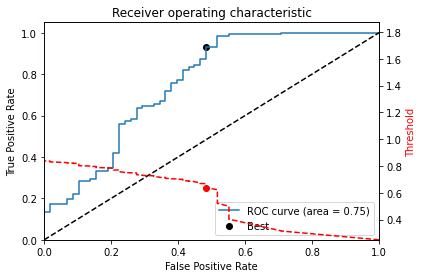

In [136]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = RanForest.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_rf))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()

In [137]:
# Evaluating the best method to use in this loan prediction case wrt AUROC
score={'auc_logreg':roc_auc_logreg, 'auc_knn':roc_auc_knn, 'auc_svm_gaussian':roc_auc_svg, 'auc_nb':roc_auc_nb, 'auc_dtc':roc_auc_dt, 'auc_rfc':roc_auc_rf}
score_list=[]
for i in score:
    score_list.append(score[i])
    u=max(score_list)
    if score[i]==u:
        v=i  
    print(f"{i}={score[i]}");   
print(f"The best AUROC score in this case is {v} with accuracy score {u}")

auc_logreg=0.7489818083084442
auc_knn=0.6870757534618516
auc_svm_gaussian=0.7529866956285637
auc_nb=0.74178658702145
auc_dtc=0.6875509095845778
auc_rfc=0.7533260928590823
The best AUROC score in this case is auc_rfc with accuracy score 0.7533260928590823


In [138]:
# Evaluating the best method to use in this loan prediction case wrt accuracy
score={'as_logreg':as_logreg, 'as_knn':as_knn, 'as_svm_gaussian':as_svm_gaussian, 'as_nb':as_nb, 'as_dtc':as_dtc, 'as_rfc':as_rfc}
score_list=[]
for i in score:
    score_list.append(score[i])
    u=max(score_list)
    if score[i]==u:
        v=i  
    print(f"{i}={score[i]}");   
print(f"The best accuracy score in this case is {v} with accuracy score {u}")

as_logreg=0.7351351351351352
as_knn=0.6972972972972973
as_svm_gaussian=0.7675675675675676
as_nb=0.7783783783783784
as_dtc=0.7189189189189189
as_rfc=0.8216216216216217
The best accuracy score in this case is as_rfc with accuracy score 0.8216216216216217


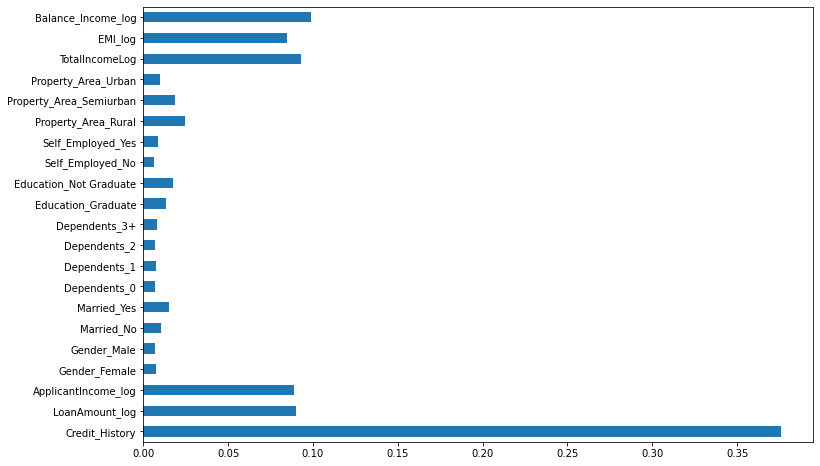

In [139]:
importances=pd.Series(RanForest.feature_importances_, index=x_train1.columns) 
importances.plot(kind='barh', figsize=(12,8))

#### XGBOOST

In [140]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [141]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train1,y_train1)
y_pred=classifier.predict(x_cv1)
cm=confusion_matrix(y_cv1,y_pred)
accuracy_score(y_cv1,y_pred)

0.7837837837837838

In [142]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.08 %
Standard Deviation: 6.10 %


Best Threshold=0.607579, G-Mean=0.698


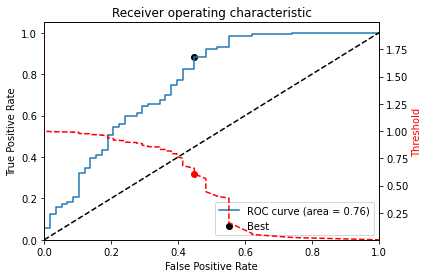

In [143]:
from numpy import sqrt
from numpy import argmax
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(x_cv1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv1, preds)
roc_auc_rf = metrics.auc(fpr, tpr)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

plt.figure()
plt.title('Receiver Operating Characterstics')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc_rf))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
 
# create the axis of thresholds (scores)
ax2 = plt.gca().twinx()
ax2.plot(fpr, threshold, markeredgecolor='r',linestyle='dashed', color='r')
ax2.scatter(fpr[ix], threshold[ix], marker='o', color='r', label='Best1')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([threshold[-1],threshold[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.show()